# Welcome to Machine Learning Assignment 2

## Setup

In [1]:
import numpy as np
import pandas as pd
import io
import os
import IPython
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from zlib import crc32
import tarfile
import urllib.request
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests

## Importing the data

In [2]:
# Downloading the csv file from your GitHub account

#test_url = "https://raw.githubusercontent.com/Mosahr/ML_assignment_2/main/Data/test.csv" # Make sure the url is the raw version of the file on GitHub
#test_req = requests.get(test_url).content

#train_url = "https://raw.githubusercontent.com/Mosahr/ML_assignment_2/main/Data/train.csv"
#train_req = requests.get(train_url).content

# Reading the downloaded content and turning it into a pandas dataframe

#test = pd.read_csv(io.StringIO(test_req.decode('utf-8')))
#train = pd.read_csv(io.StringIO(train_req.decode('utf-8')))

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Visualisation 

In [4]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

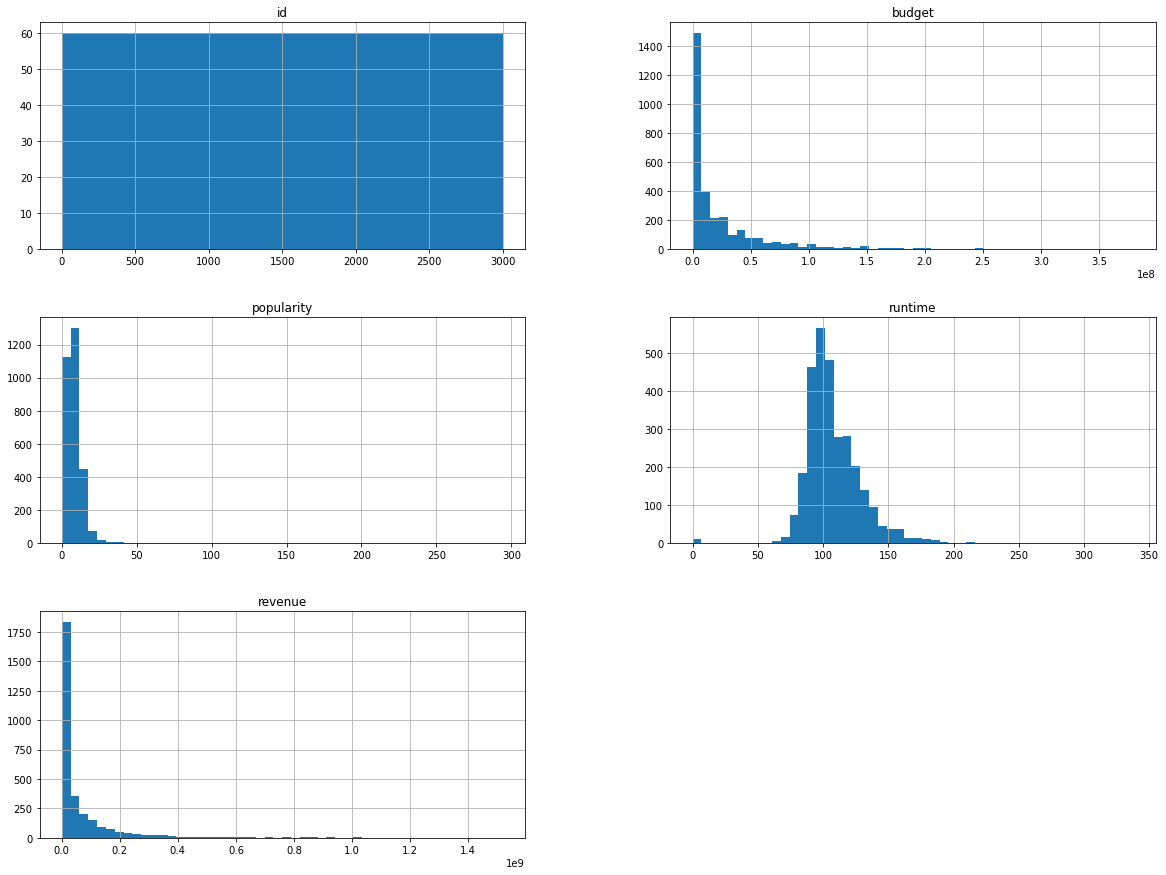

In [6]:
%matplotlib inline
train.hist(bins=50, figsize=(20,15))
plt.show()

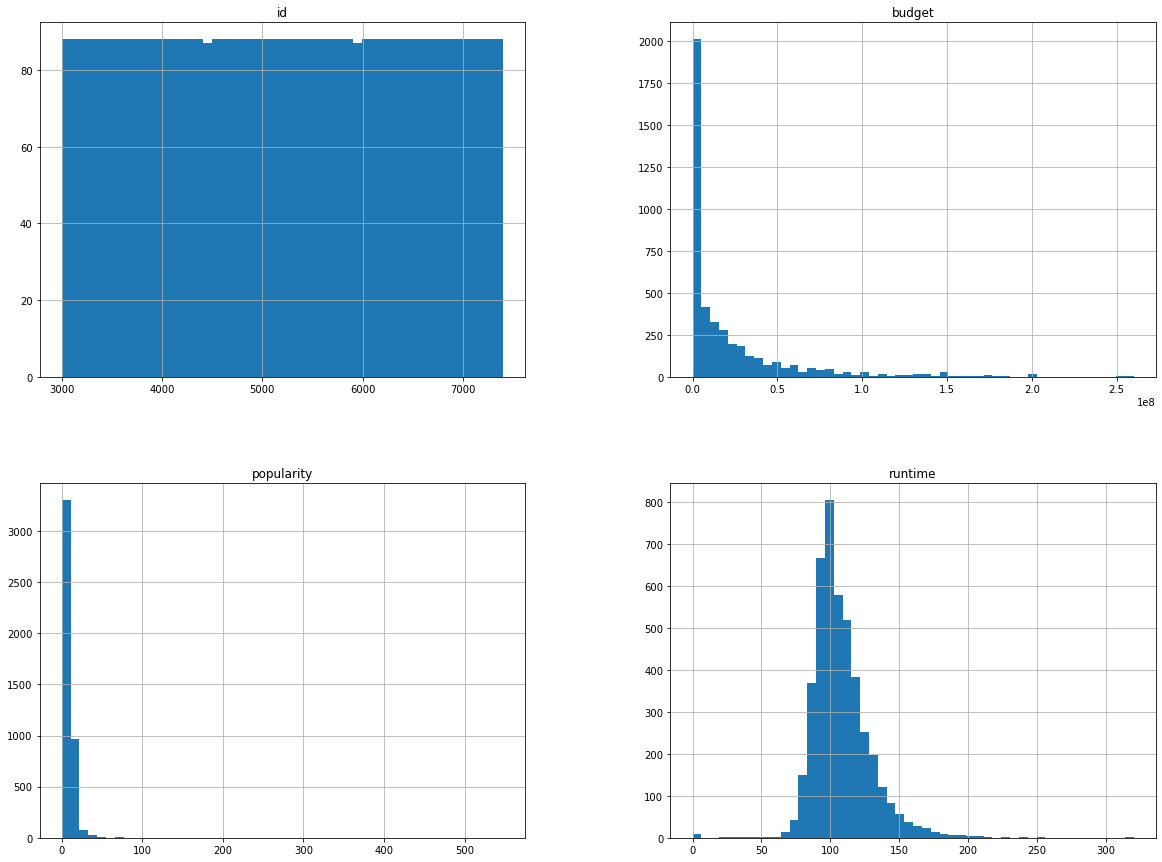

In [7]:
%matplotlib inline
test.hist(bins=50, figsize=(20,15))
plt.show()

We create a new attribute popularity per day, which gives the average of the popularity each day.

In [8]:
train["pop_per_day"] = train["popularity"]/train["runtime"]

<AxesSubplot:xlabel='revenue', ylabel='pop_per_day'>

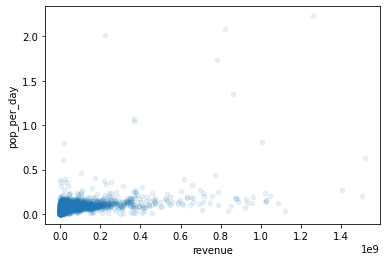

In [9]:
train.plot(kind="scatter", x = "revenue", y = "pop_per_day", alpha = 0.1)

In [10]:
#These are the attributes we are currently working with
attributes = ["budget", "runtime", "popularity", "revenue","pop_per_day"]
train = train[attributes]
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   budget       3000 non-null   int64  
 1   runtime      2998 non-null   float64
 2   popularity   3000 non-null   float64
 3   revenue      3000 non-null   int64  
 4   pop_per_day  2998 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 117.3 KB


In [11]:
#Correlation matrix for the attributes we are using
corr_matrix = train.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue        1.000000
budget         0.752965
popularity     0.461460
pop_per_day    0.429610
runtime        0.216380
Name: revenue, dtype: float64

<AxesSubplot:>

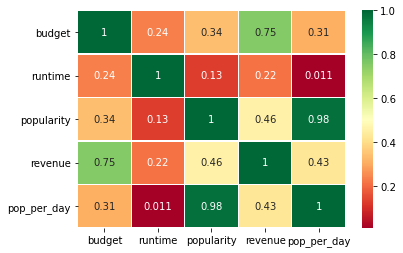

In [12]:
sns.heatmap(corr_matrix, annot=True,cmap='RdYlGn',linewidths=0.2)

## Prepare data for Algorithm

In [15]:
#Drop the rows where one of the values is NaN
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   budget       2998 non-null   int64  
 1   runtime      2998 non-null   float64
 2   popularity   2998 non-null   float64
 3   revenue      2998 non-null   int64  
 4   pop_per_day  2998 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 140.5 KB


In [14]:
scaler = StandardScaler()
train = scaler.fit_transform(train)

ValueError: Input contains infinity or a value too large for dtype('float64').